<a href="https://colab.research.google.com/github/aiyufan3/AIPI-XAI-Interpretable-ML/blob/main/AIPI_Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIPI 590 - XAI | Assignment #03
### Description
### Yufan Ai

#### Include the button below. Change the link to the location in your github repository:
#### Example: https://colab.research.google.com/github/yourGHName/yourREPOName/blob/yourBranchName/yourFileName.ipynb


[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/aiyufan3/AIPI-XAI-Interpretable-ML/blob/main/AIPI_Assignment3.ipynb)

## DO:
* Use markdown and comments effectively
* Pull out classes and functions into scripts
* Ensure cells are executed in order and avoid skipping cells to maintain reproducibility
* Choose the appropriate runtime (i.e. GPU) if needed
* If you are using a dataset that is too large to put in your GitHub repository, you must either pull it in via Hugging Face Datasets or put it in an S3 bucket and use boto3 to pull from there.
* Use versioning on all installs (ie pandas==1.3.0) to ensure consistency across versions
* Implement error handling where appropriate

## DON'T:
* Absolutely NO sending us Google Drive links or zip files with data (see above).
* Load packages throughout the notebook. Please load all packages in the first code cell in your notebook.
* Add API keys or tokens directly to your notebook!!!! EVER!!!
* Include cells that you used for testing or debugging. Delete these before submission
* Have errors rendered in your notebook. Fix errors prior to submission.

#### Using environment variables in Google Colab

In Google Colab, locate the key button on the left side of the screen. You can enter in any environment variables or API keys here and they will remain private.

Then add the environment variables to your notebook using the code below.

Make sure to document in your notebook if you are using API keys and how to get them (ie share a link for documentation to get a Hugging Face API Key if you are using Hugging Face)

###Environment Set Up

In [2]:
!pip install pandas==1.5.3 numpy==1.23.5 seaborn==0.12.2 matplotlib==3.7.1 scikit-learn==1.2.2 statsmodels==0.14.0

In [3]:
!pip install pygam # install the missing package


  Using cached numpy-2.1.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
xarray 2024.6.0 requires pandas>=2.0, but you have pandas 1.5.3 which is incompatible.


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod.families import Gamma
from statsmodels.genmod.families.links import Log
from statsmodels.tools import add_constant
from pygam import LinearGAM, s
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from pygam import LogisticGAM


# Exploratory Data Analysis to check Assumptions

In [14]:
# Load the dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Display the first few rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [15]:
# Summary statistics for numerical features
df.describe()

# Info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<ipython-input-17-f34d775d1cee>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


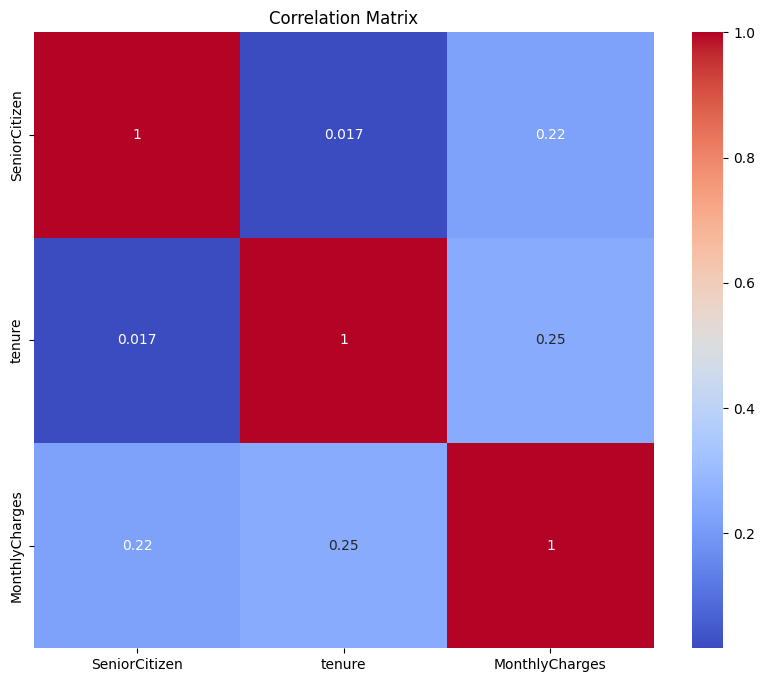

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


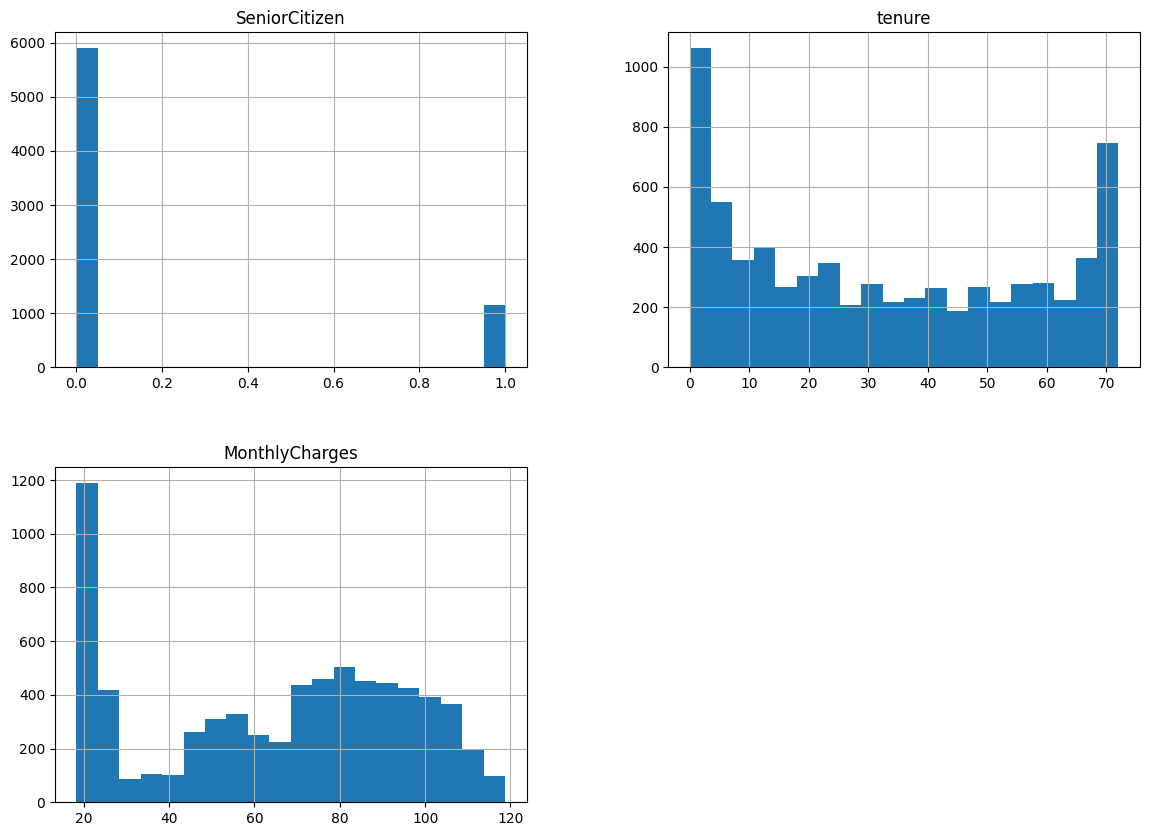

In [18]:
df.hist(bins=20, figsize=(14,10))
plt.show()


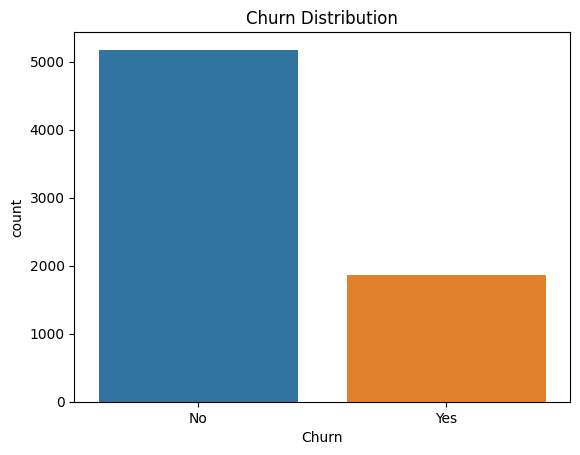

In [19]:
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()


In [20]:
# Create a dataframe with numerical features only
numeric_df = df.select_dtypes(include=[np.number])

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = numeric_df.columns
vif_data["VIF"] = [variance_inflation_factor(numeric_df.values, i) for i in range(len(numeric_df.columns))]

print(vif_data)

          feature       VIF
0   SeniorCitizen  1.256364
1          tenure  2.617403
2  MonthlyCharges  2.924996


# Linear Regression

In [21]:
# Encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Separate the features and target variable
X = df_encoded.drop(columns='Churn_Yes')
y = df_encoded['Churn_Yes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create and train the model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = lr_model.predict(X_test_scaled)

# Evaluate the model
print("R-squared:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R-squared: 0.2325826195520737
RMSE: 0.3896651575573448


In [23]:
# Coefficients of the model
coef_df = pd.DataFrame(lr_model.coef_, X.columns, columns=['Coefficient'])
print(coef_df)

                       Coefficient
SeniorCitizen             0.011187
tenure                   -0.036717
MonthlyCharges            0.008934
customerID_0003-MKNFE    -0.002564
customerID_0004-TLHLJ     0.006038
...                            ...
TotalCharges_997.75       0.000000
TotalCharges_998.1       -0.000062
TotalCharges_999.45       0.004084
TotalCharges_999.8        0.000000
TotalCharges_999.9       -0.002917

[13601 rows x 1 columns]


# Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

# Create and train the model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_log = log_model.predict(X_test_scaled)
y_pred_proba = log_model.predict_proba(X_test_scaled)[:,1]

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba))


Accuracy: 0.7501183151916706
ROC-AUC: 0.8325918681074863


In [25]:
# Coefficients of the model
log_coef_df = pd.DataFrame(np.exp(log_model.coef_[0]), X.columns, columns=['Odds Ratio'])
print(log_coef_df)


                       Odds Ratio
SeniorCitizen            1.203807
tenure                   0.545723
MonthlyCharges           1.174672
customerID_0003-MKNFE    0.965177
customerID_0004-TLHLJ    1.085550
...                           ...
TotalCharges_997.75      1.000000
TotalCharges_998.1       0.994298
TotalCharges_999.45      1.062097
TotalCharges_999.8       1.000000
TotalCharges_999.9       0.959384

[13601 rows x 1 columns]


In [26]:
# Classification report
print(classification_report(y_test, y_pred_log))


              precision    recall  f1-score   support

           0       0.75      0.99      0.85      1539
           1       0.76      0.12      0.20       574

    accuracy                           0.75      2113
   macro avg       0.75      0.55      0.53      2113
weighted avg       0.75      0.75      0.68      2113



# Generalized Additive Model (GAM)

In [27]:
# Build and train a GAM model
gam = LogisticGAM(s(0) + s(1) + s(2) + s(3) + s(4)).fit(X_train_scaled, y_train)


In [28]:
# Predict on the test set
y_pred_gam = gam.predict(X_test_scaled)

# Evaluate the model
print("GAM Accuracy:", accuracy_score(y_test, y_pred_gam))
print("GAM ROC-AUC:", roc_auc_score(y_test, gam.predict_proba(X_test_scaled)))


GAM Accuracy: 0.7969711310932324
GAM ROC-AUC: 0.8359918540705875


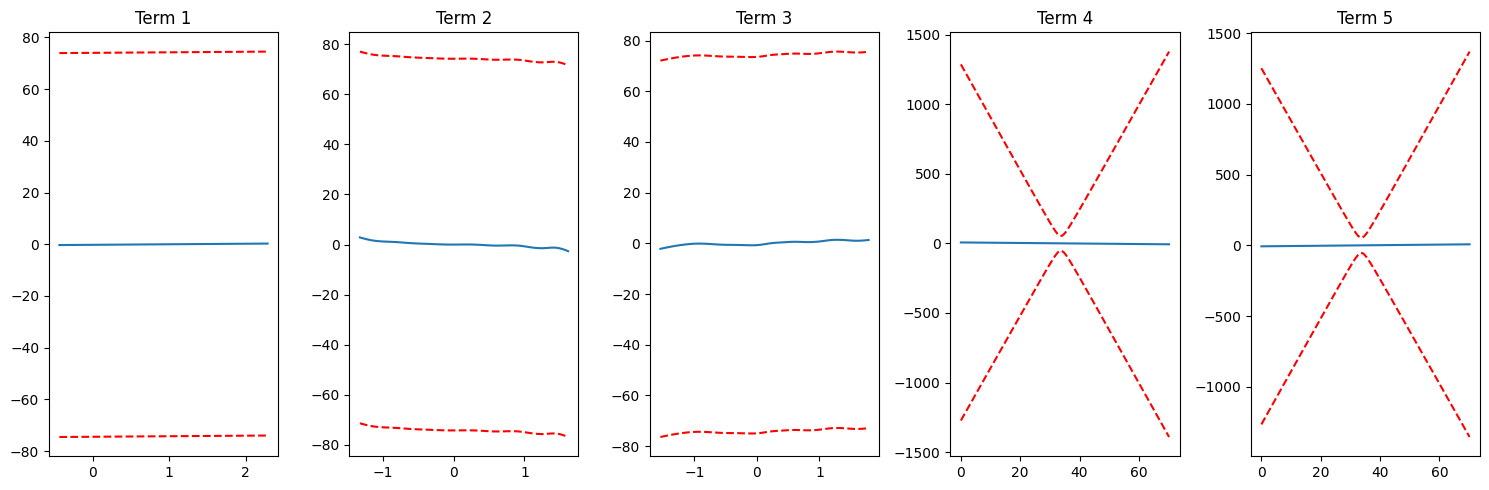

In [29]:
# Plot the terms to interpret the model
fig, axs = plt.subplots(1, len(gam.terms) - 1, figsize=(15, 5))  # Exclude the intercept

# Iterate over the terms, starting from index 0
for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    ax.set_title(f'Term {i + 1}')  # Add 1 to the term index for correct labeling
plt.tight_layout()
plt.show()


# Model Comparison

In [30]:
results = {
    "Model": ["Linear Regression", "Logistic Regression", "GAM"],
    "R-squared/Accuracy": [r2_score(y_test, y_pred), accuracy_score(y_test, y_pred_log), accuracy_score(y_test, y_pred_gam)],
    "RMSE/ROC-AUC": [np.sqrt(mean_squared_error(y_test, y_pred)), roc_auc_score(y_test, y_pred_proba), roc_auc_score(y_test, gam.predict_proba(X_test_scaled))]
}

results_df = pd.DataFrame(results)
print(results_df)


                 Model  R-squared/Accuracy  RMSE/ROC-AUC
0    Linear Regression            0.232583      0.389665
1  Logistic Regression            0.750118      0.832592
2                  GAM            0.796971      0.835992


*Based on the results, the GAM (Generalized Additive Model) outperformed both Linear Regression and Logistic Regression in terms of accuracy (79.7%) and ROC-AUC (0.836), indicating its superior ability to capture non-linear relationships between customer features and churn. While Linear Regression is easy to interpret, its low R-squared suggests it poorly fits the data. Logistic Regression offers a good balance between performance and interpretability, but it assumes linearity in the log-odds, which may miss important patterns. The GAM, though more complex, provides the best predictive performance and captures non-linear effects, making it the recommended model for the telecommunications company to use in predicting customer churn.*